In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

plt.style.use('ggplot')
data = pd.read_json('./data.json')

In [2]:
X = data.x.values.reshape(-1,1)
y = data.y.values.reshape(-1,1)

In [3]:
regressor = svm.SVR()
regressor.fit(X, y)
y_pred = regressor.predict(X)

/home/alex/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


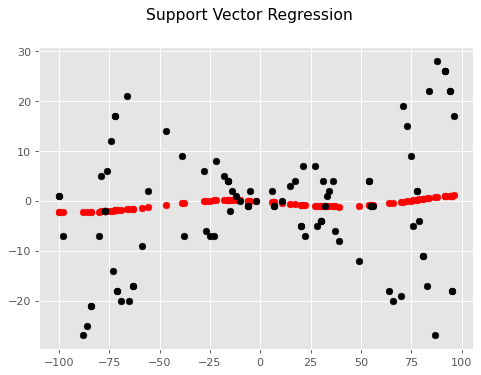

In [4]:
plt.figure(figsize=(7, 5), dpi=80)
plt.scatter(X, y_pred, color='red')
plt.scatter(X, y,  color='black')
plt.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [5]:
clf = svm.OneClassSVM(gamma='auto').fit(data)

In [6]:
estimations = clf.predict(data)

In [11]:
X_inlier =  []
y_inlier =  []
X_outlier = []
y_outlier = []
for i, row in enumerate(data.values):
    if estimations[i] == 1:
        X_inlier.append(row[0])
        y_inlier.append(row[1])
    else:
        X_outlier.append(row[0])
        y_outlier.append(row[1])

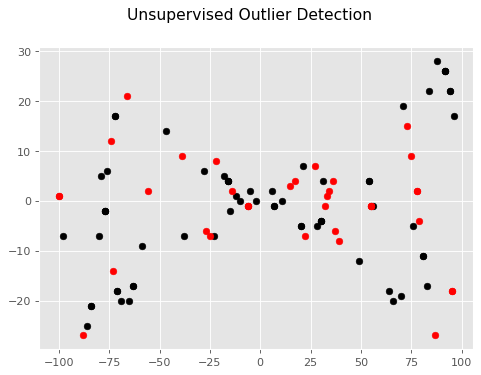

In [12]:
plt.figure(figsize=(7, 5), dpi=80)
plt.scatter(X_inlier, y_inlier, color='black')
plt.scatter(X_outlier, y_outlier,  color='red')
plt.suptitle("Unsupervised Outlier Detection", fontsize=14)
plt.show()